In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

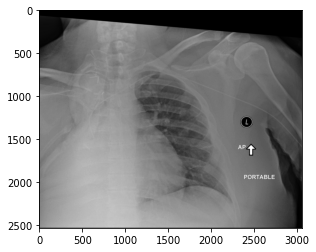

In [3]:
path=r"C:\Users\Dell\OneDrive\Desktop\Softsensor.ai\X- ray image"
for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break

In [4]:
print(img_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 2 8 ... 2 2 2]
 [0 0 3 ... 0 0 0]
 [0 1 3 ... 0 0 0]]


In [5]:
img_array.shape

(2532, 3056)

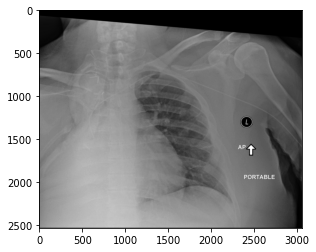

In [6]:
plt.imshow(img_array, cmap="gray")
plt.show()

## Resizing all images to a common shape

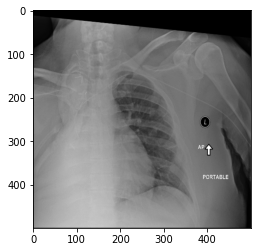

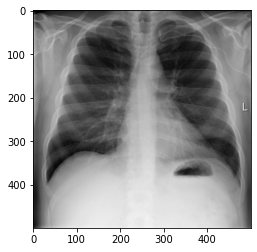

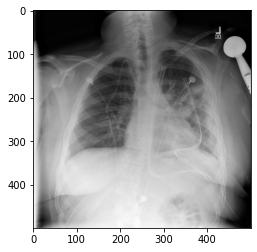

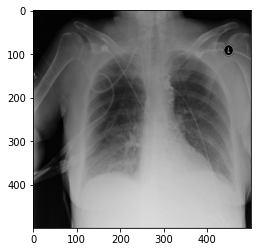

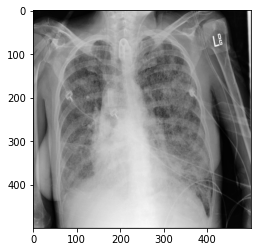

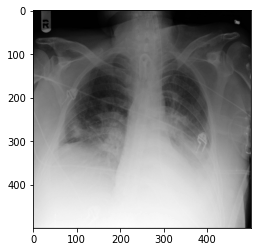

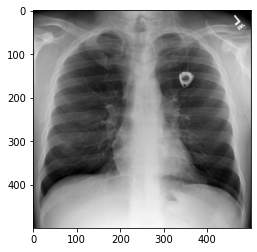

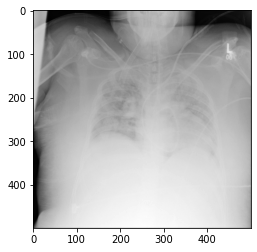

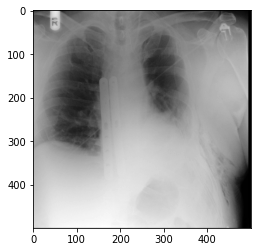

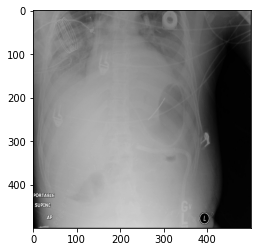

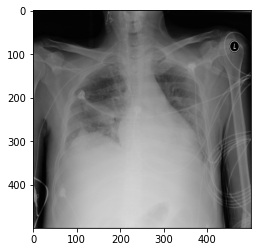

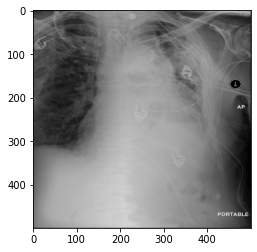

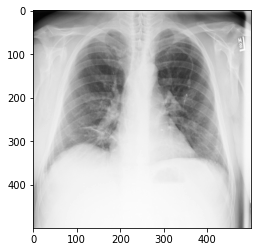

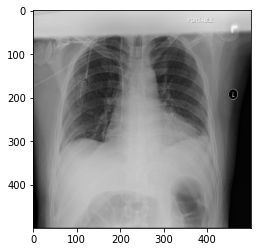

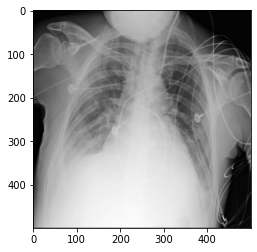

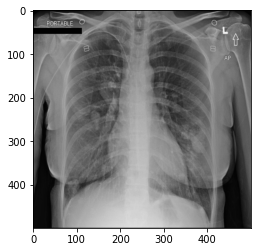

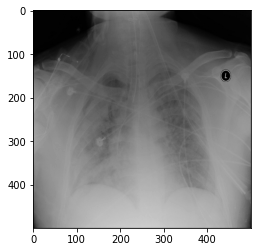

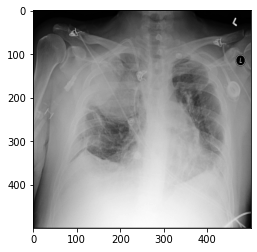

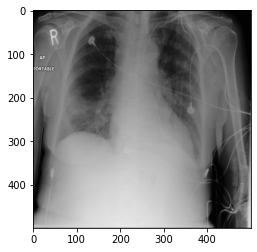

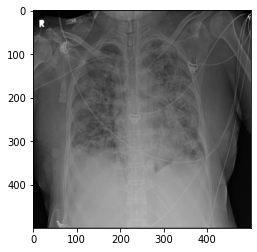

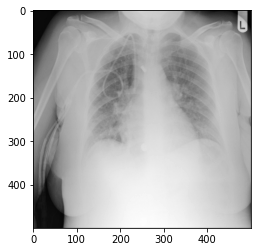

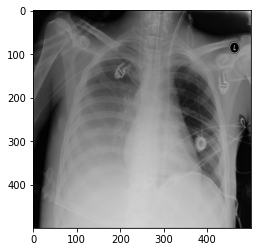

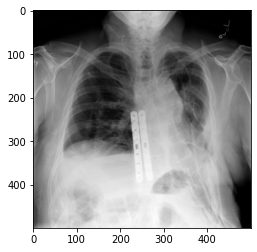

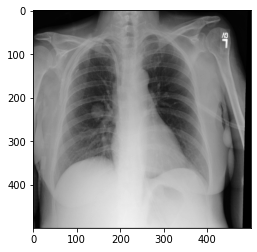

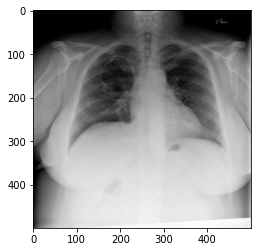

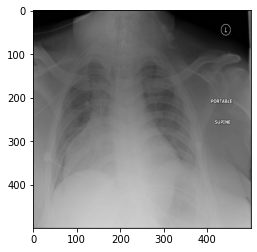

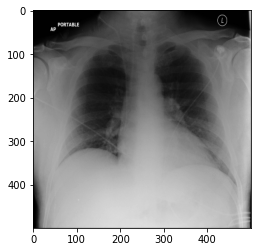

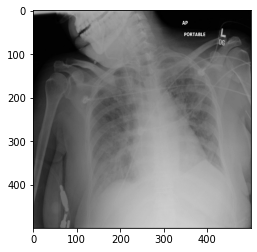

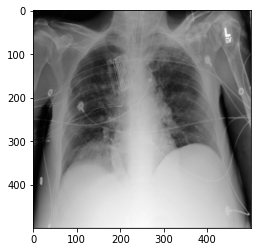

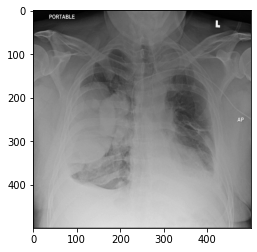

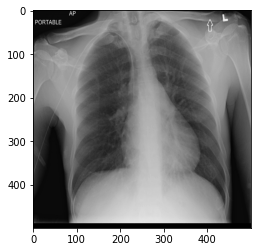

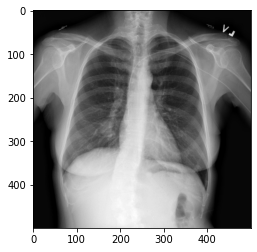

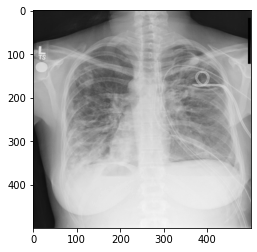

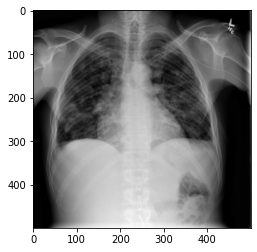

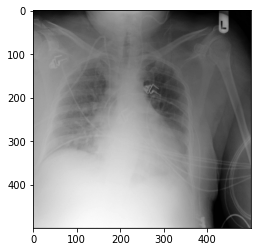

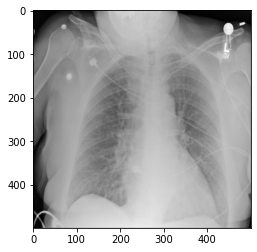

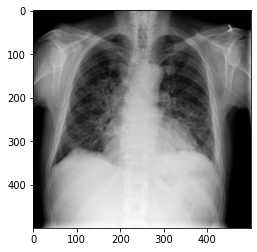

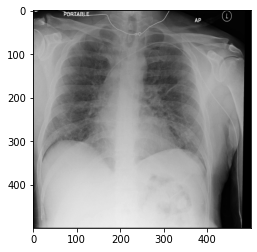

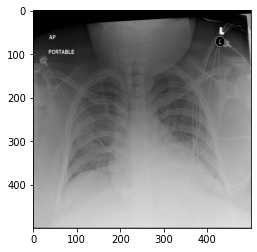

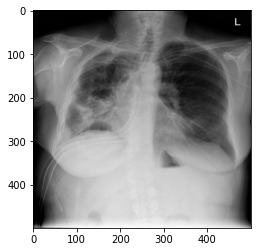

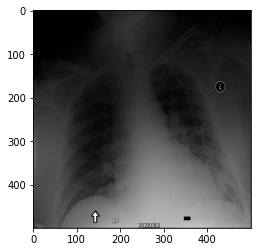

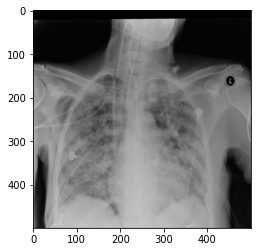

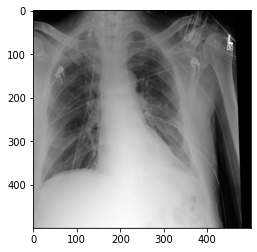

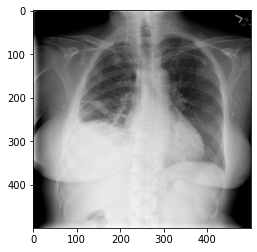

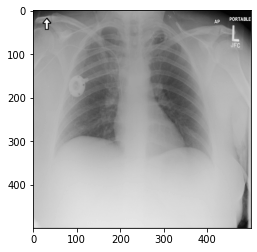

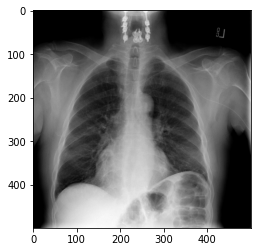

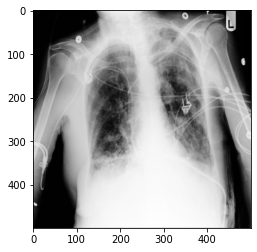

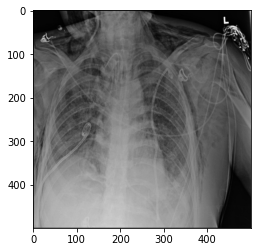

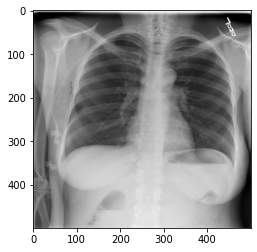

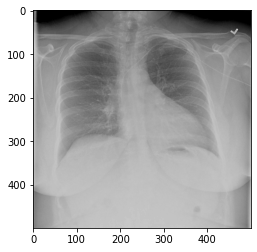

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [7]:
images=[]
for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    resized_img=cv2.resize(img_array, (500,500))
    images.append(resized_img)
    plt.imshow(resized_img, cmap="gray")
    plt.show()

In [8]:
print(len(images))

50


In [9]:
#10 random images
random.shuffle(images)
for sample in images[:10]:
    print(sample[0])
    break

[255 255 254 255 255 254 253 252 250 248 247 248 244 242 241 241 240 238
 237 241 239 236 236 234 232 236 237 232 231 232 233 231 232 230 231 231
 230 230 229 230 233 229 230 228 227 230 229 228 227 225 228 226 226 223
 227 224 225 223 224 225 224 227 223 223 223 223 223 227 224 222 226 222
 220 222 222 224 221 222 224 223 224 223 225 224 222 222 221 220 221 221
 223 225 225 223 223 224 225 222 224 221 222 222 224 222 223 221 224 219
 219 218 223 222 222 222 225 220 221 217 220 223 220 226 225 230 230 232
 231 235 237 237 240 239 240 237 241 241 238 242 243 240 240 240 243 239
 241 239 242 239 243 239 240 240 240 242 244 240 243 243 242 244 242 240
 241 241 241 244 242 242 242 242 243 241 242 243 244 242 241 242 241 242
 241 242 240 242 241 240 240 240 241 241 238 241 241 240 242 246 246 248
 245 246 247 250 248 248 248 250 247 248 249 248 246 251 249 249 250 249
 247 249 248 249 247 248 246 250 248 248 244 248 247 245 247 247 247 249
 247 248 247 246 248 246 246 246 245 246 246 247 24

# 1) Canny Edge Detection

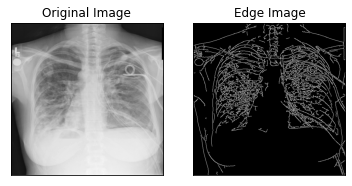

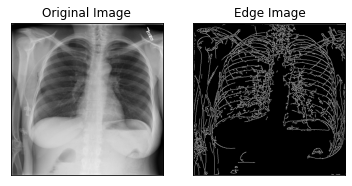

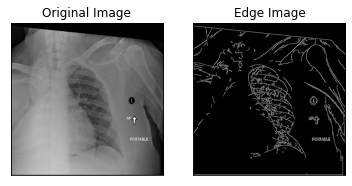

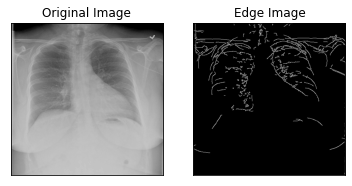

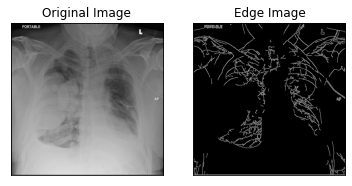

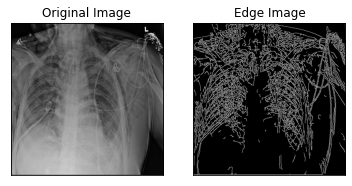

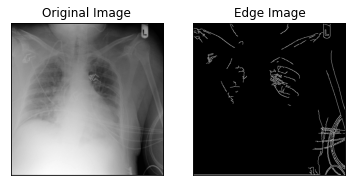

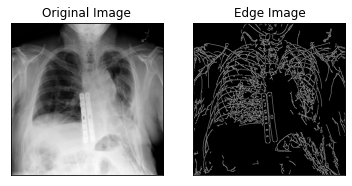

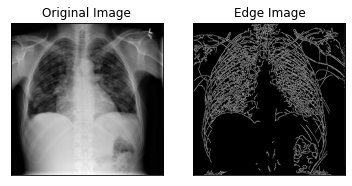

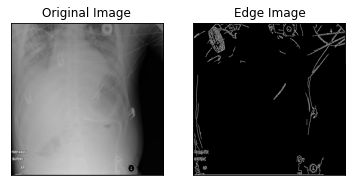

In [33]:
#Applying Canny Edge Detection on 10 Random Images
random.shuffle(images)
# type(images[0])
for sample in images[:10]:
    # print(sample.shape)
    edges = cv2.Canny(sample,35,70)
    plt.subplot(121),plt.imshow(sample,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
# The edges of the Scans are highlighted as a result of this Image Processing Technique.

# 2) Binarization based on Threshold

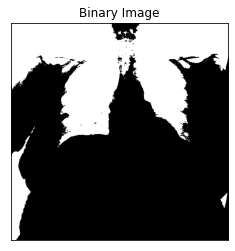

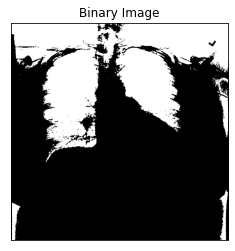

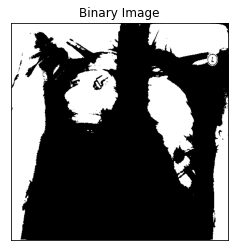

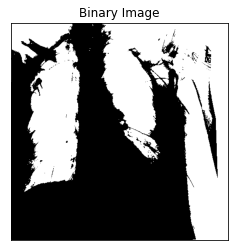

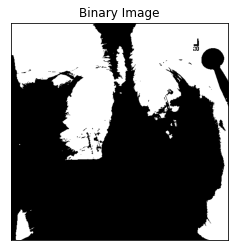

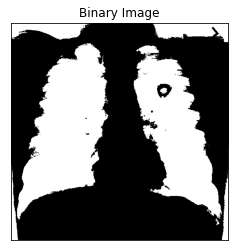

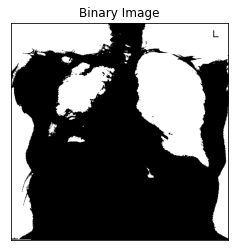

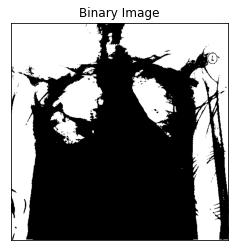

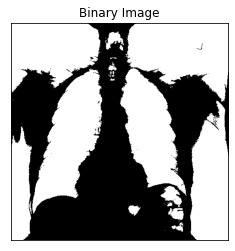

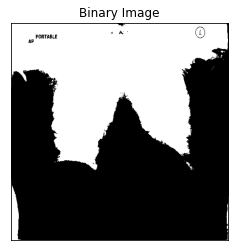

In [11]:
#Binarization brings a certain region of the image to the foreground, leaving rest for the background.
random.shuffle(images)
for sample in images[:10]:
    copy = sample
    img = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    copy = img
    _ , binary = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(binary, cmap = "gray")
    plt.title('Binary Image'), plt.xticks([]), plt.yticks([])
    plt.show()

In [12]:
# Binarization on the basis of thresholding makes a crisp black and white distinction in the Scans.

# 3) Contour Detection

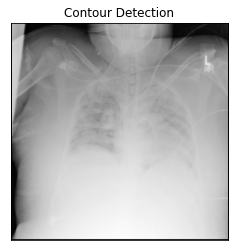

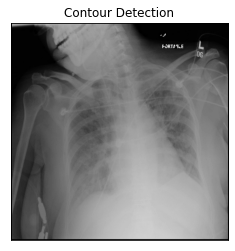

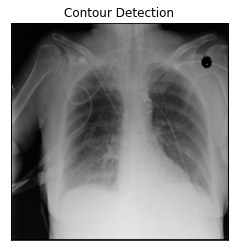

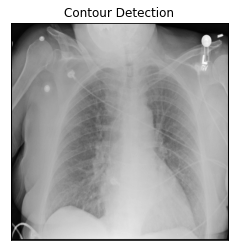

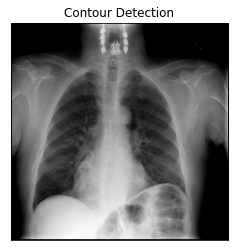

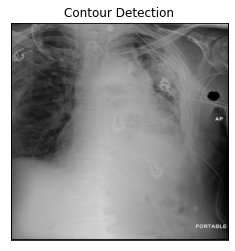

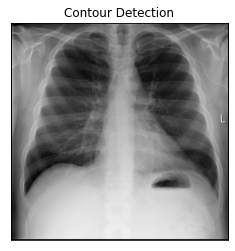

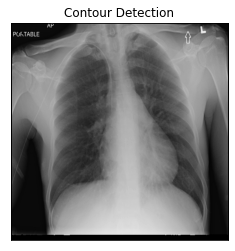

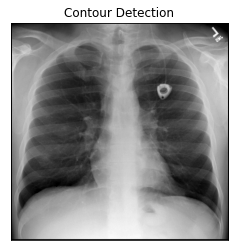

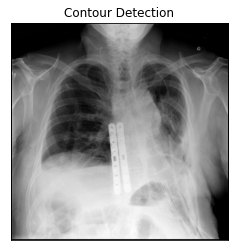

In [13]:
#Contour Detection is basically line joining points in order to form a border.
random.shuffle(images)
for sample in images[:10]:
    contours, _ = cv2.findContours(sample, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
    copy = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    image = cv2.drawContours(copy, contours, -1, (0, 255, 0), 2)
    plt.imshow(image,cmap = "gray")
    plt.title('Contour Detection'), plt.xticks([]), plt.yticks([])
    plt.show()

In [14]:
# The resultant image has curves joining a set of continuous points having same color or intensity in the Scans.

# 4) Sharpening

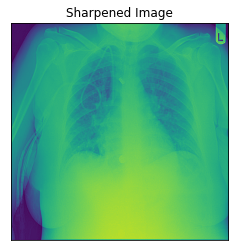

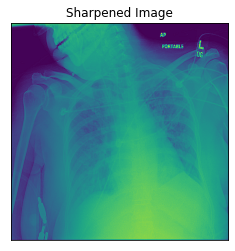

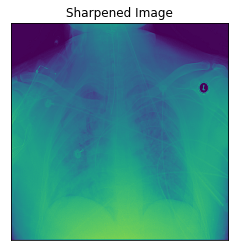

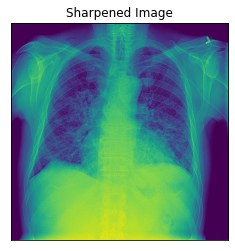

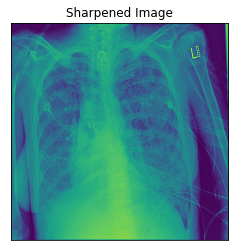

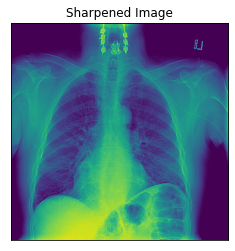

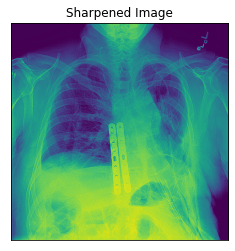

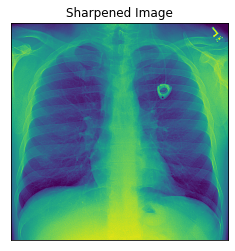

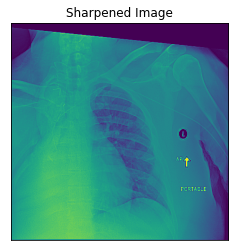

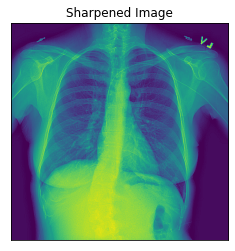

In [60]:
#Sharpening filters enhance the edges of objects and adjust the contrast and the shade characteristics
random.shuffle(images)
for sample in images[:10]:
    sharp_kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
    sharp_img = cv2.filter2D(src=sample, ddepth=-10, kernel=sharp_kernel)
    plt.imshow(sharp_img)
    plt.title('Sharpened Image'), plt.xticks([]), plt.yticks([])
    plt.show()

In [16]:
# The lines and cathetors are more easily visible in the sharpened images, but so are the ribs.

# 5) Emboss Filter

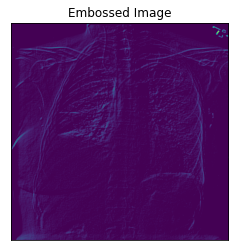

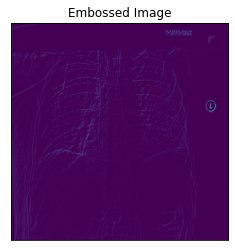

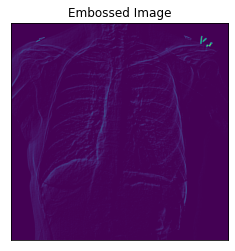

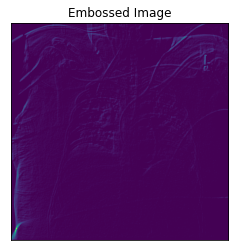

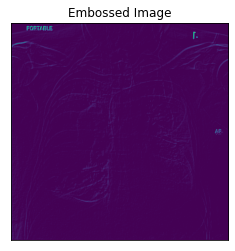

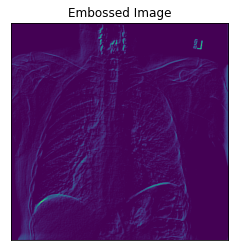

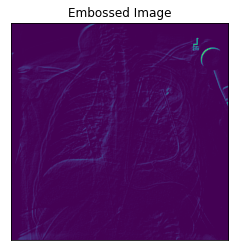

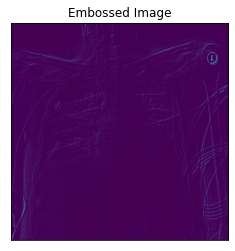

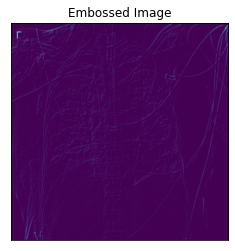

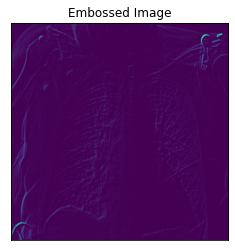

In [53]:
random.shuffle(images)
for sample in images[:10]:
    emboss_kernel = np.array([[-1, 0, 0],
                    [0, 0, 0],
                    [0, 0, 1]])
    emboss_img = cv2.filter2D(src=sample, ddepth=-9, kernel=emboss_kernel)
    plt.imshow(emboss_img)
    plt.title('Embossed Image'), plt.xticks([]), plt.yticks([])
    plt.show()

In [54]:
#The resultant image is a 3D depiction of the Original X-ray Scan.

# 6) Median Blur

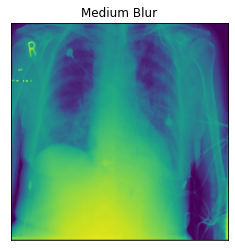

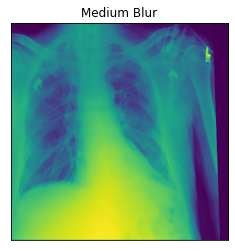

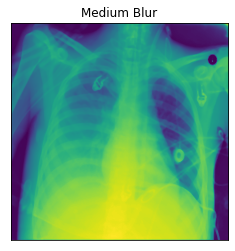

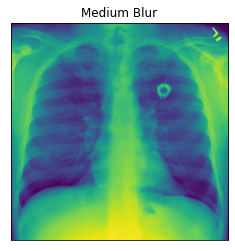

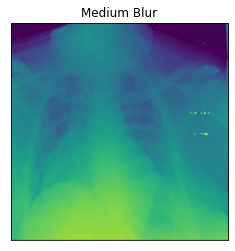

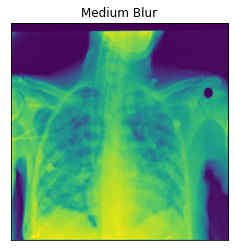

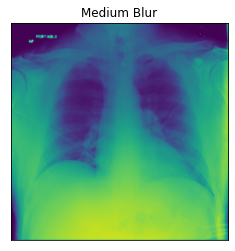

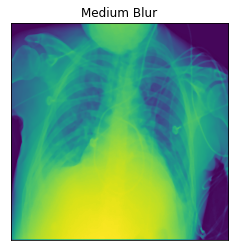

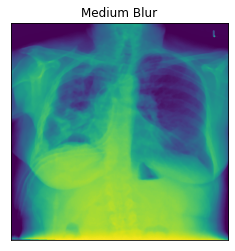

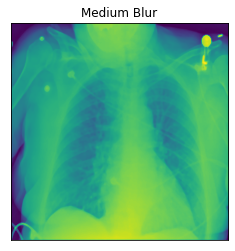

In [48]:
random.shuffle(images)
for sample in images[:10]:
    median_blur = cv2.medianBlur(src=sample, ksize=5)
    plt.imshow(median_blur)
    plt.title('Medium Blur'), plt.xticks([]), plt.yticks([])
    plt.show()

In [49]:
#The resultant image has reduced noise with preserved edges

# 7) Gaussian Blur

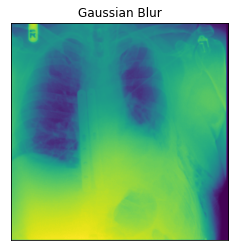

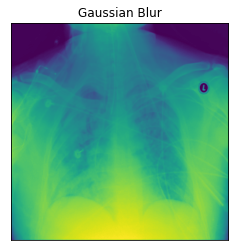

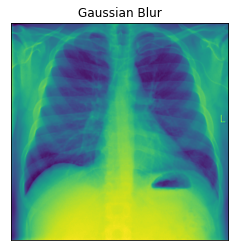

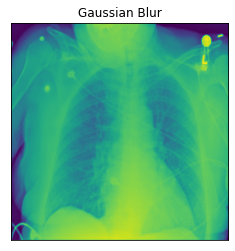

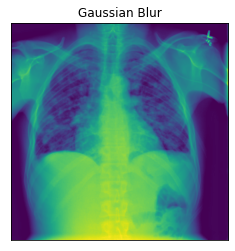

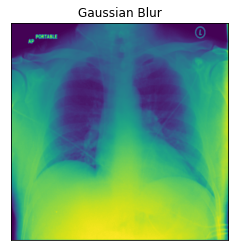

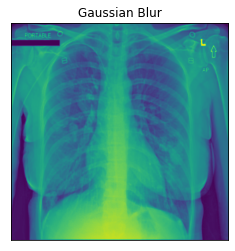

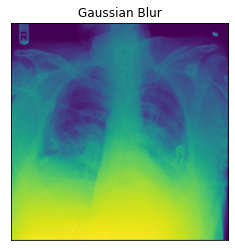

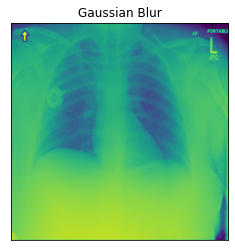

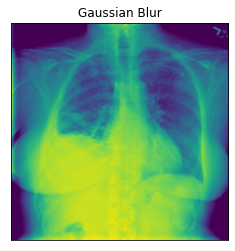

In [34]:
random.shuffle(images)
for sample in images[:10]:
    gaussian_blur = cv2.GaussianBlur(src=sample, ksize=(3,3),sigmaX=0, sigmaY=0)
    plt.imshow(gaussian_blur)
    plt.title('Gaussian Blur'), plt.xticks([]), plt.yticks([])
    plt.show()

In [35]:
#The Gaussian Blur Filter blurs out the image by using a Gaussian Kernel which is an array of pixels. 
#Each pixel in the image gets multiplied by a Gaussian Kernel.
#This filter blurs out the ribs due to which the lines and catheters become detectable.

# 8) Bilateral Filter

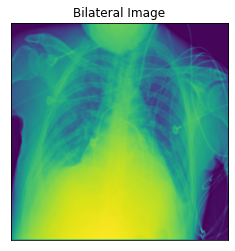

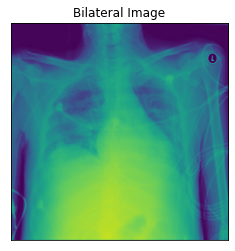

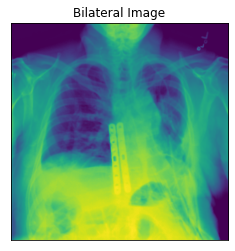

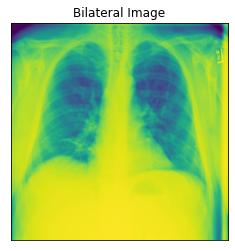

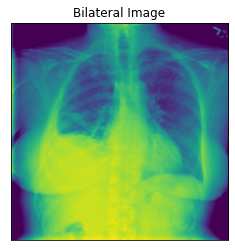

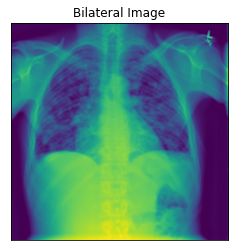

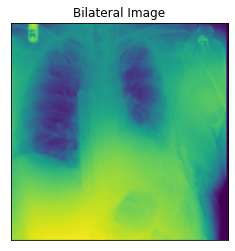

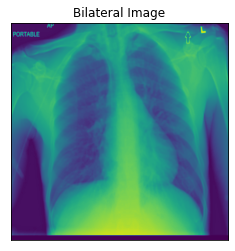

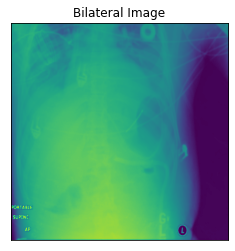

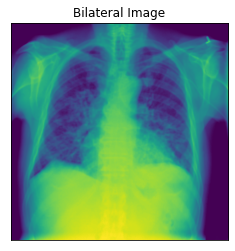

In [44]:
#Bilateral Filter replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels.
#Applying Binary Filter to 10 Random X-ray Scan
random.shuffle(images)
for sample in images[:10]:
    bilateral = cv2.bilateralFilter(sample, 5, 75, 75)
    plt.imshow(bilateral)
    plt.title('Bilateral Image'), plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
##The resultant image is smoothened with reduced noise and preserved edges.

# <font color = red>Conclusion : Observing the above transformations resulting from various Image Processing Techniques, I find  Gaussian Blur Filteration to be the most suitable technique to detect lines and catheters. A good choice of diameter, SigmaColor and SigmaSpace can effectively increase the visibility and ease of detection of the lines and catheters. The resulting image contains lines and catheters as distinc prominent lines of the same pixel intensity, which is best for easy detection.</font> 

# 1) Training Data needs to be prepared by marking the lines and catheters in an image dataset with about a million scans of diverse origins
# 2) This Training Data can be fed into a Machine Learning Model. Most suitable ML Model in this case would be CNN of Deep Learning.
# 3) The Model can then be tested against a fresh Dataset of unmarked Scans called the Testing Data.
# 4) Overfitting or underfitting must be detected and resolved.